## Multilinear Regression (Multiple Linear Regression)

**Definition:**
Multilinear regression (also called **Multiple Linear Regression**) is a statistical technique used to **predict the value of a dependent variable** (target) based on **two or more independent variables** (features).

It is an **extension of simple linear regression**, which only has one independent variable.

---

### Mathematical Equation :

Y = β0 ​+ β1​X1​ + β2​X2 ​+ β3​X3 ​+ ... + βn​Xn​+ε 

Where:
- Y: Dependent variable (the value we want to predict)
- X1 , X2,..., Xn : Independent variables (input features).
- β0 : Intercept (constant term)
- 𝛽1, 𝛽2,..., 𝛽𝑛β1​ : Coefficients (weights showing the effect of each 𝑋𝑖 on 𝑌)
- 𝜀 : Error term (difference between predicted and actual value).

As the **Number of Input Feature increases** , that many number of **Co-efficient will increases**.

---

### **Example** : 

Let’s say we want to predict a house price (Y) based on:

- Size (X₁) in square feet

- Number of bedrooms (X₂)

- Distance from city center (X₃)

Then the model could look like:

Price = β0 ​+ β1 ​(Size) + β2​ (Bedrooms) + β3​(Distance) + ε

---

### **Key Assumptions :**

**1. Linearity** — The relationship between dependent and independent variables is linear.

**2. Independence** — Observations are independent of each other.

**3. Homoscedasticity** — Constant variance of errors.

**4. No multicollinearity** — Independent variables are not highly correlated.

**5. Normality** — Errors are normally distributed.

----

### **Use Cases**

- Predicting house prices

- Estimating sales based on advertising budget

- Predicting student marks based on study hours and attendance

- Financial forecasting and business analytics

---

### Multilinear Regression Example

#### Step 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#### Step 2: Load Dataset

In [3]:
# Example: Housing dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Step 3: Check for Missing Values

In [4]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

#### Step 4: Define Features (X) and Target (y)

In [5]:
X = df.drop(columns=["MedHouseVal"])  # Independent variables
y = df["MedHouseVal"]  # Dependent variable

#### Step 5: Split Data into Train and Test Sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 6: Train the Linear Regression Model

In [7]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Step 7: Make Predictions

In [8]:
y_pred = model.predict(X_test)

#### Step 8: Evaluate the Model

In [9]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 0.5332001304956555
Mean Squared Error: 0.5558915986952442
Root Mean Squared Error: 0.7455813830127763
R² Score: 0.575787706032451


#### Step 9: Compare Actual vs Predicted

In [10]:
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
results.head(10)

,Actual,Predicted
20046,0.47700,0.719123
3024,0.45800,1.764017
15663,5.00001,2.709659
20484,2.18600,2.838926
9814,2.78000,2.604657
13311,1.58700,2.011754
7113,1.98200,2.645500
7668,1.57500,2.168755
18246,3.40000,2.740746
5723,4.46600,3.915615


#### Step 10: Visualization

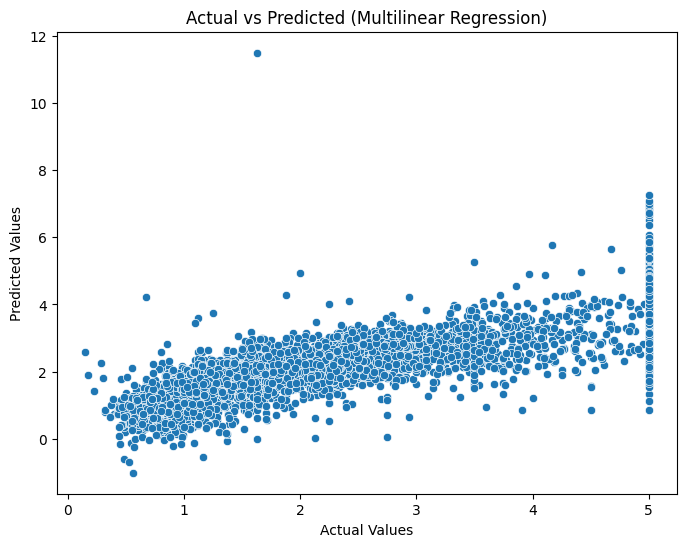

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Multilinear Regression)")
plt.show()

#### Step 11: Coefficients

In [12]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print(coeff_df)

            Coefficient
MedInc         0.448675
HouseAge       0.009724
AveRooms      -0.123323
AveBedrms      0.783145
Population    -0.000002
AveOccup      -0.003526
Latitude      -0.419792
Longitude     -0.433708
